In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from barra_read import get_aus_stn_info
from mpl_toolkits.basemap import Basemap


In [9]:
loc_id, points = get_aus_stn_info()
removed = ['Broome', 'Port Hedland', 'Carnarvon', 'Meekatharra', 'Perth', 'Esperance', 'Kalgoorlie', 'Halls Creek']
points = np.array(points)[np.in1d(loc_id, removed, invert=True)]
loc_id = loc_id[np.in1d(loc_id, removed, invert=True)]
topog = xr.open_dataset("/g/data/du7/barpa/trials/BARPA-EASTAUS_12km/static/topog-BARPA-EASTAUS_12km.nc")["topog"]
lons = [points[i][0] for i in np.arange(len(points))]
lats = [points[i][1] for i in np.arange(len(points))]

barpac_m_topog = xr.open_dataset("/g/data/du7/barpa/trials/BARPAC-M_km2p2/static/topog-BARPAC-M_km2p2.nc")
x1=barpac_m_topog.longitude.values.min()
x2=barpac_m_topog.longitude.values.max()
y1=barpac_m_topog.latitude.values.min()
y2=barpac_m_topog.latitude.values.max()

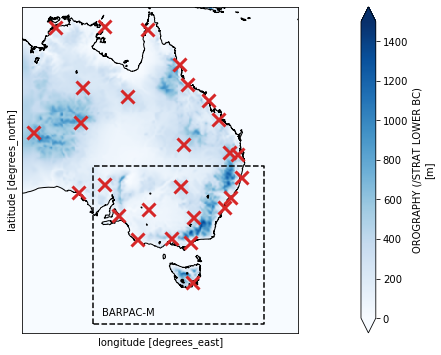

In [14]:
plt.figure(figsize=[8,6])
m = Basemap(llcrnrlon=110, llcrnrlat=-49, urcrnrlon=160, urcrnrlat=-10,projection="cyl", resolution="i");\
topog.plot(vmin=0, vmax=1500, cmap=plt.get_cmap("Blues"))
m.drawcoastlines()
plt.xlim(127,160)
plt.plot(lons, lats, marker="x", color="tab:red", linestyle="none", mew=3, ms=13)
plt.title("")
plt.text(x1+1,y1+1,"BARPAC-M")
plt.plot([x1,x1,x2,x2,x1],[y1,y2,y2,y1,y1],color="k",ls="--")
plt.savefig("/g/data/eg3/ab4502/figs/barpa/aws_locs.png", bbox_inches="tight")

135.5